# Using turicreate for easy ML on SEEG dataset

For example, one thing that makes it easy is that turicreate automagically creates dummy variables for categorical features.

In [194]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading cleaned data

In [84]:
sf = tc.SFrame.read_csv('electrodes_clean.csv')
sf.explore() # in GUI

# optional save to SFrame
# sf = tc.SFrame('electrodes_clean.sframe')

Finished parsing file /Users/pieter/Dropbox/Data Science/Machine_Learning_iOS_Dev/turicreate-pk/electrodes_clean.csv

Parsing completed. Parsed 100 lines in 0.035029 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/pieter/Dropbox/Data Science/Machine_Learning_iOS_Dev/turicreate-pk/electrodes_clean.csv

Parsing completed. Parsed 860 lines in 0.011321 secs.

Materializing SFrame...

Done.

## Preparing data

We cannot have both TPLE and TPLE category in same set or results will be biased. So create two data sets: one for regression (removing TPLE category as feature) and one for classification (removing TPLE as feature).

Regarding the final (automatically selected) model:
- `<model>.summary()` summarizes the model parameters
- `<model>.features` shows which features have been included (= all selected for model building)

In [111]:
sf_reg   = sf.remove_column('TPLE category')
sf_class = sf.remove_column('TPLE')

## Regression approach

In [112]:
sf_reg_train, sf_reg_test = sf_reg.random_split(0.8)
reg_model = tc.regression.create(sf_reg_train, target = 'TPLE')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees regression:

--------------------------------------------------------

Number of examples          : 653

Number of features          : 16

Number of unpacked features : 16

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.010024     | 16.889999          | 8.588558             | 2.877870      | 3.128701        |

| 2         | 0.017893     | 14.356499          | 8.330094             | 2.335031      | 2.634117        |

| 3         | 0.024582     | 12.214850          | 8.085856             | 1.954499      | 2.338607        |

| 4         | 0.032202     | 10.323213          | 7.867498             | 1.653496      | 2.110311        |

| 5         | 0.039163     | 8.832760           | 7.744569             | 1.459051      | 2.070699        |

| 6         | 0.046199     | 7.507846           | 7.660192             | 1.331713      | 2.019974        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

In [113]:
reg_model.evaluate(sf_reg_test)

{'max_error': 14.209460735321045, 'rmse': 2.453981787261874}

In [115]:
reg_model.summary()

Class                          : BoostedTreesRegression

Schema
------
Number of examples             : 653
Number of feature columns      : 16
Number of unpacked features    : 16

Settings
--------
Number of trees                : 10
Max tree depth                 : 6
Training time (sec)            : 0.072
Training rmse                  : 1.0384
Validation rmse                : 1.9882
Training max_error             : 5.0893
Validation max_error           : 7.5279



## Classification approach

### Multi-class solution

Using TPLE category

In [122]:
sf_class_train, sf_class_test = sf_class.random_split(0.8)

In [123]:
class_model = tc.classifier.create(sf_class_train, target = 'TPLE category')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 642

Number of classes           : 5

Number of feature columns   : 16

Number of unpacked features : 16

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.029589     | 0.747664          | 0.500000            | 1.299938          | 1.439662            |

| 2         | 0.053220     | 0.802181          | 0.500000            | 1.074125          | 1.346899            |

| 3         | 0.075981     | 0.811526          | 0.478261            | 0.937439          | 1.275376            |

| 4         | 0.098935     | 0.828660          | 0.500000            | 0.827948          | 1.247268            |

| 5         | 0.121740     | 0.848910          | 0.478261            | 0.738936          | 1.242491            |

| 6         | 0.146128     | 0.864486          | 0.456522            | 0.655975          | 1.229840            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 642

Number of classes           : 5

Number of feature columns   : 16

Number of unpacked features : 16

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.027882     | 0.721184          | 0.391304            | 0.907961          | 1.342106            |

| 2         | 0.049574     | 0.730530          | 0.478261            | 0.876542          | 1.338163            |

| 3         | 0.072152     | 0.741433          | 0.434783            | 0.846838          | 1.336017            |

| 4         | 0.093758     | 0.742991          | 0.434783            | 0.844381          | 1.303801            |

| 5         | 0.117028     | 0.747664          | 0.413043            | 0.836875          | 1.301310            |

| 6         | 0.139089     | 0.744548          | 0.413043            | 0.844208          | 1.287283            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 642

Number of classes           : 5

Number of feature columns   : 16

Number of unpacked features : 16

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.029922     | 0.747664          | 0.500000            | 0.840261          | 1.323202            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 642

Number of classes           : 5

Number of feature columns   : 16

Number of unpacked features : 16

Number of coefficients      : 68

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.006840     | 0.582555          | 0.586957            |

| 2         | 3        | 0.013646     | 0.580997          | 0.630435            |

| 3         | 4        | 0.019890     | 0.585670          | 0.652174            |

| 4         | 5        | 0.026063     | 0.587227          | 0.652174            |

| 5         | 6        | 0.032472     | 0.587227          | 0.652174            |

| 6         | 7        | 0.038648     | 0.587227          | 0.652174            |

+-----------+----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.45652174949645996
PROGRESS: RandomForestClassifier          : 0.45652174949645996
PROGRESS: DecisionTreeClassifier          : 0.5
PROGRESS: LogisticClassifier              : 0.652174
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


SUCCESS: Optimal solution found.

In [175]:
metrics = class_model.evaluate(sf_class_test)
metrics
# metrics['confusion_matrix']

{'accuracy': 0.5872093023255814,
 'auc': 0.6144711849310336,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 13
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    5 - 10    |       > 10      |   2   |
 |    0 - 1     |      1 - 2      |   1   |
 |     > 10     |      1 - 2      |   1   |
 |    5 - 10    |      5 - 10     |   3   |
 |    2 - 5     |      2 - 5      |   96  |
 |    1 - 2     |      2 - 5      |   31  |
 |    5 - 10    |      2 - 5      |   17  |
 |    0 - 1     |      2 - 5      |   10  |
 |    1 - 2     |      1 - 2      |   2   |
 |     > 10     |      5 - 10     |   2   |
 +--------------+-----------------+-------+
 [13 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.2118482843362263,
 'log_loss': 1.241136997120201,


In [126]:
class_model.summary()

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 68
Number of examples             : 642
Number of classes              : 5
Number of feature columns      : 16
Number of unpacked features    : 16

Hyperparameters
---------------
L1 penalty                     : 0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 6
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.042

Settings
--------
Log-likelihood                 : 656.061

Highest Positive Coefficients
-----------------------------
ElectrodeType[Orthogonal]      : 2.4113
ElectrodeType[Orthogonal]      : 2.0806
(intercept)                    : 1.6926
ElectrodeType[Orthogonal]      : 1.1783
ElectrodeType[Orthogonal]      : 1.1245

Lowest Negative Coefficients
----------------------------
(intercept)                    : -5.2147
(intercept)

### Binary solution

Creating new column "Deviated" (yes/no) based on -arbitrary- cut off value.

In [192]:
# create new dataset - easier when experimenting with different cutoff values
# remove column 'TPLE category' - otherwise we severely bias results
sf_dev = sf_class.remove_column('TPLE category') 

def evaluate_classification_for_cutoff(value):
    '''Creates dataframe with predefined cutoff value. 
    
    Useful to play with different cutoffs. Value represents the deviation in mm.
    Returns metrics of model'''
    sf_dev['Deviated'] = sf['TPLE'].apply(lambda tple: 'yes' if tple > value else 'no')
    sf_dev_train, sf_dev_test = sf_dev.random_split(0.8)
    model = tc.classifier.create(sf_dev_train, target = 'Deviated', verbose = False)
    metrics = model.evaluate(sf_dev_test)
    return metrics
    
cutoff_values = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
results = {}

for cv in cutoff_values:
    metr = evaluate_classification_for_cutoff(cv)
    results.update({cv: metr})

Cutoff 1.5 - Accuracy: 0.80  |  AUC: 0.50
Cutoff 2.0 - Accuracy: 0.68  |  AUC: 0.71
Cutoff 2.5 - Accuracy: 0.60  |  AUC: 0.60
Cutoff 3.0 - Accuracy: 0.65  |  AUC: 0.68
Cutoff 3.5 - Accuracy: 0.63  |  AUC: 0.64
Cutoff 4.0 - Accuracy: 0.80  |  AUC: 0.70


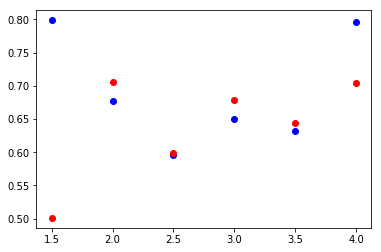

In [221]:
plt.figure()
for cutoff, metric in results.items():
    acc = metric['accuracy']; auc = metric['auc']
    print(f"Cutoff {cutoff} - Accuracy: {acc:.2f}  |  AUC: {auc:.2f}")
    plt.plot(cutoff, acc, 'bo', label = 'Accuracy') # Accuracy in BLUE
    plt.plot(cutoff, auc, 'ro', label = 'AUC') # AUC in RED